### Tarea 05 Medidas de Centralidad

In [1]:
#Librerías
import pandas as pd
import numpy as np
from networkx import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "GoT/"
Libros_GoT = ["book"+str(i+1)+".csv" for i in range(5)]
dfs = {}
for i in range(len(Libros_GoT)):
    dfs[Libros_GoT[i][:-4]] = pd.read_csv(path+Libros_GoT[i])

#### 1. Obtener las medidas de centralidad para la red formada por la co-ocurrencia entre personajes, esto nos dará la 'importancia' de cada personaje. Realizar el cálculo para cada libro, con ello tendremos 5 valores por personaje para cada medida de centralidad. 

#### 2. Para el paso anterior utiliza degree, betweenness y pagerank como medidas de centralidad. Intenta hallar algo que llame tu atención, por decir, algún personaje que tenga un degree bajo respecto a otros, pero un betwenness alto.

In [3]:
#Aquí creo un arreglo que contenga todos los personajes de los 5 libros
personajes_GoT = np.unique(np.concatenate([pd.unique(dfs["book"+str(i+1)][["Source", "Target"]].values.ravel('K')) for i in range(4)]))

#Creo el dataframe que contenga como única columna los personajes 
GoT = pd.DataFrame(personajes_GoT, columns = ["personajes_GoT"])

#Aquí itero sobre cada libro para sacar las 3 medidas de centralidad: degree, betweenness y pagerank 
for book in list(dfs.keys()):
    #Extraer en formato de tuplas source y target
    source_targets = dfs[book][["Source", "Target"]]
    arr_source_targets = source_targets.to_records(index=False)
    tuplas_source_targets = list(arr_source_targets)
    
    #Creo el grafo con las tuplas por libro
    G = nx.DiGraph()
    G.add_edges_from(tuplas_source_targets)
    
    #Crear columna de medidas de centralidad por cada libro y personaje   
    GoT["degree_centrality_"+book] = GoT["personajes_GoT"].map(degree_centrality(G))
    GoT["betweenness_centrality_"+book] = GoT["personajes_GoT"].map(betweenness_centrality(G))
    GoT["pagerank_"+book] = GoT["personajes_GoT"].map(pagerank(G))

#Pongo como indice el nombre del personaje
GoT = GoT.set_index("personajes_GoT")
GoT

,degree_centrality_book1,betweenness_centrality_book1,pagerank_book1,degree_centrality_book2,betweenness_centrality_book2,pagerank_book2,degree_centrality_book3,betweenness_centrality_book3,pagerank_book3,degree_centrality_book4,betweenness_centrality_book4,pagerank_book4,degree_centrality_book5,betweenness_centrality_book5,pagerank_book5
personajes_GoT,,,,,,,,,,,,,,,
Addam-Marbrand,0.010753,0.0,0.002196,NaN,NaN,NaN,0.026490,0.0,0.001341,0.014652,0.0,0.001674,NaN,NaN,NaN
Aegon-Frey-(son-of-Stevron),NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.0,0.001341,NaN,NaN,NaN,NaN,NaN,NaN
Aegon-I-Targaryen,0.010753,0.0,0.002196,0.019380,0.0,0.001647,0.009934,0.0,0.001341,NaN,NaN,NaN,0.003165,0.0,0.001442
Aegon-Targaryen-(son-of-Rhaegar),NaN,NaN,NaN,NaN,NaN,NaN,0.003311,0.0,0.001341,0.003663,0.0,0.001674,0.047468,0.0,0.001442
Aegon-V-Targaryen,NaN,NaN,NaN,0.003876,0.0,0.001647,NaN,NaN,NaN,0.003663,0.0,0.001674,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yohn-Royce,NaN,NaN,NaN,NaN,NaN,NaN,0.003311,0.0,0.002028,0.029304,0.0,0.019497,NaN,NaN,NaN
Yoren,0.037634,0.0,0.016568,0.046512,0.0,0.012108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yorko-Terys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003663,0.0,0.001763,NaN,NaN,NaN


La tabla anterior reune las métrica por libro de cada personaje.

#### 3. Identifica los 3 personajes con la mayor variación en su importancia del libro 1 al 5. Utiliza esos 3 personajes y otros 5 de tu elección y grafica la evolución de la importancia de dichos personajes a través de los 5 libros. Utiliza el tipo de grafico que consideres más adecuado para representar la evolución. Ustedes elijan la métrica (medida de centralidad) que graficaran para este punto.

Para este ejercicio, la medida de centralidad utilizada será pagerank pues en mi opinión, esta métrica capta aquellos nodos más importantes e influyentes dentro de las redes. En primer lugar, obtenemos la varianza de pagerank por libro de cada personaje y obtendremos el top 3 con mayor varianza.

In [13]:
GoT_pagerank = GoT[["pagerank_book1", "pagerank_book2", "pagerank_book3", "pagerank_book4", "pagerank_book5"]]
#GoT_pagerank = GoT[["degree_centrality_book1", "degree_centrality_book2", "degree_centrality_book3", "degree_centrality_book4", "degree_centrality_book5"]]
variance_pagerank_GoT = GoT_pagerank.apply(lambda x: np.nanvar(x), axis = 1)

In [14]:
order_variance_pagerank_GoT = variance_pagerank_GoT.sort_values(ascending=False)
top_3_variance_pagerank_GoT = np.array(order_variance_pagerank_GoT.index)[0:3]

In [15]:
top_3_variance_pagerank_GoT

array(['Tywin-Lannister', 'Varys', 'Tyrion-Lannister'], dtype=object)

In [16]:
top_3_variance_pagerank_GoT = GoT_pagerank[GoT_pagerank.index.isin(top_3_variance_pagerank_GoT)]
top_3_variance_pagerank_GoT

,pagerank_book1,pagerank_book2,pagerank_book3,pagerank_book4,pagerank_book5
personajes_GoT,,,,,
Tyrion-Lannister,0.063987,0.056968,0.050362,0.046896,0.021493
Tywin-Lannister,0.043695,0.029343,0.036780,0.054749,0.010660
Varys,0.051900,0.032061,0.033996,0.023297,0.006685


Podemos observar que el pagerank de estos personajes sí muestran cambios en cada libro. Esto se interpreta que el personaje tuvo participaciones por libro más influyentes que en otros.

Para los otros 5 personajes, tomaremos a: Eddard Stark, Jaime Lannister, Catelyn Stark y Cersei Lannister y Daenerys Targaryen.

In [17]:
characters = ["Eddard-Stark", "Jaime-Lannister", "Catelyn-Stark", "Cersei-Lannister", "Daenerys-Targaryen"]

In [18]:
characters_GoT = GoT_pagerank[GoT_pagerank.index.isin(characters)]
characters_GoT

,pagerank_book1,pagerank_book2,pagerank_book3,pagerank_book4,pagerank_book5
personajes_GoT,,,,,
Catelyn-Stark,0.002690,0.002577,0.003185,0.002271,0.001442
Cersei-Lannister,0.005036,0.002437,0.002665,0.005268,0.002055
Daenerys-Targaryen,0.003908,0.002773,0.003813,NaN,0.006654
Eddard-Stark,0.009668,0.002848,0.002007,0.001760,0.003078
Jaime-Lannister,0.006920,0.003216,0.007474,0.015679,0.004571


In [19]:
characters_GoT_pagerank = pd.concat([top_3_variance_pagerank_GoT, characters_GoT])
characters_GoT_pagerank

,pagerank_book1,pagerank_book2,pagerank_book3,pagerank_book4,pagerank_book5
personajes_GoT,,,,,
Tyrion-Lannister,0.063987,0.056968,0.050362,0.046896,0.021493
Tywin-Lannister,0.043695,0.029343,0.036780,0.054749,0.010660
Varys,0.051900,0.032061,0.033996,0.023297,0.006685
Catelyn-Stark,0.002690,0.002577,0.003185,0.002271,0.001442
Cersei-Lannister,0.005036,0.002437,0.002665,0.005268,0.002055
Daenerys-Targaryen,0.003908,0.002773,0.003813,NaN,0.006654
Eddard-Stark,0.009668,0.002848,0.002007,0.001760,0.003078
Jaime-Lannister,0.006920,0.003216,0.007474,0.015679,0.004571


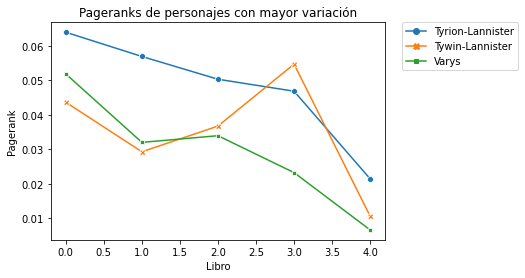

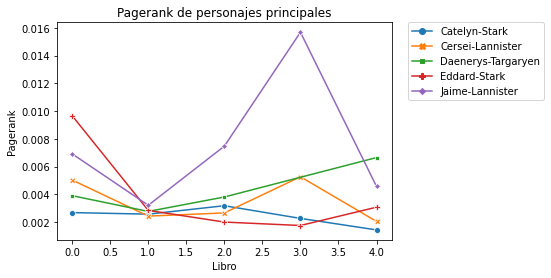

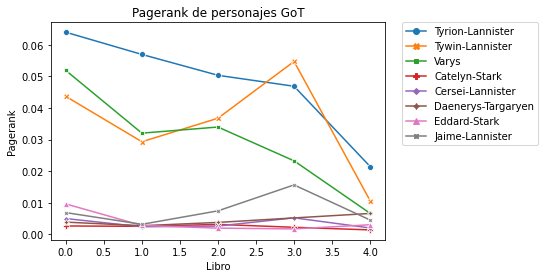

In [33]:
df1 = top_3_variance_pagerank_GoT.T
df1 = df1.reset_index(drop = True)
ax = sns.lineplot(data = df1, markers=True, dashes=False)
ax.set(title = "Pageranks de personajes con mayor variación",xlabel = "Libro", ylabel = "Pagerank")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

df2 = characters_GoT.T
df2 = df2.reset_index(drop = True)
ax = sns.lineplot(data = df2, markers=True, dashes=False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(title = "Pagerank de personajes principales", xlabel = "Libro", ylabel = "Pagerank")
plt.show()

df3 = characters_GoT_pagerank.T
df3 = df3.reset_index(drop = True)
ax = sns.lineplot(data = df3, markers=True, dashes=False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(title = "Pagerank de personajes GoT", xlabel = "Libro", ylabel = "Pagerank")
plt.show()

Podemos observas la diferencias significativa en esta métrica comparada con la de los personajes principales.